# Spam dataset with ensemble methods

In [1]:
!pip install six

In [2]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/decision_trees

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 259 (delta 2), reused 5 (delta 1), pack-reused 252
Receiving objects: 100% (259/259), 41.18 MiB | 12.29 MiB/s, done.
Resolving deltas: 100% (125/125), done.
/content/machine_learning_1/decision_trees


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(0)

# The spam email dataset

In [4]:
emails = np.array([
    [7,8,1],
    [3,2,0],
    [8,4,1],
    [2,6,0],
    [6,5,1],
    [9,6,1],
    [8,5,0],
    [7,1,0],
    [1,9,1],
    [4,7,0],
    [1,3,0],
    [3,10,1],
    [2,2,1],
    [9,3,0],
    [5,3,0],
    [10,1,0],
    [5,9,1],
    [10,8,1],
])
spam_dataset = pd.DataFrame(data=emails, columns=["Lottery", "Sale", "Spam"])
spam_dataset

,Lottery,Sale,Spam
0,7,8,1
1,3,2,0
2,8,4,1
3,2,6,0
4,6,5,1
5,9,6,1
6,8,5,0
7,7,1,0
8,1,9,1
9,4,7,0


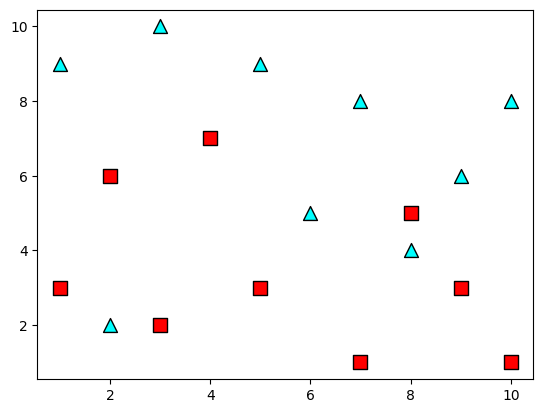

In [5]:
features = spam_dataset[['Lottery', 'Sale']]
labels = spam_dataset['Spam']
utils.plot_points(features, labels)

In [6]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)
decision_tree_classifier.fit(features, labels)
decision_tree_classifier.score(features, labels)

1.0

# Training a decision tree

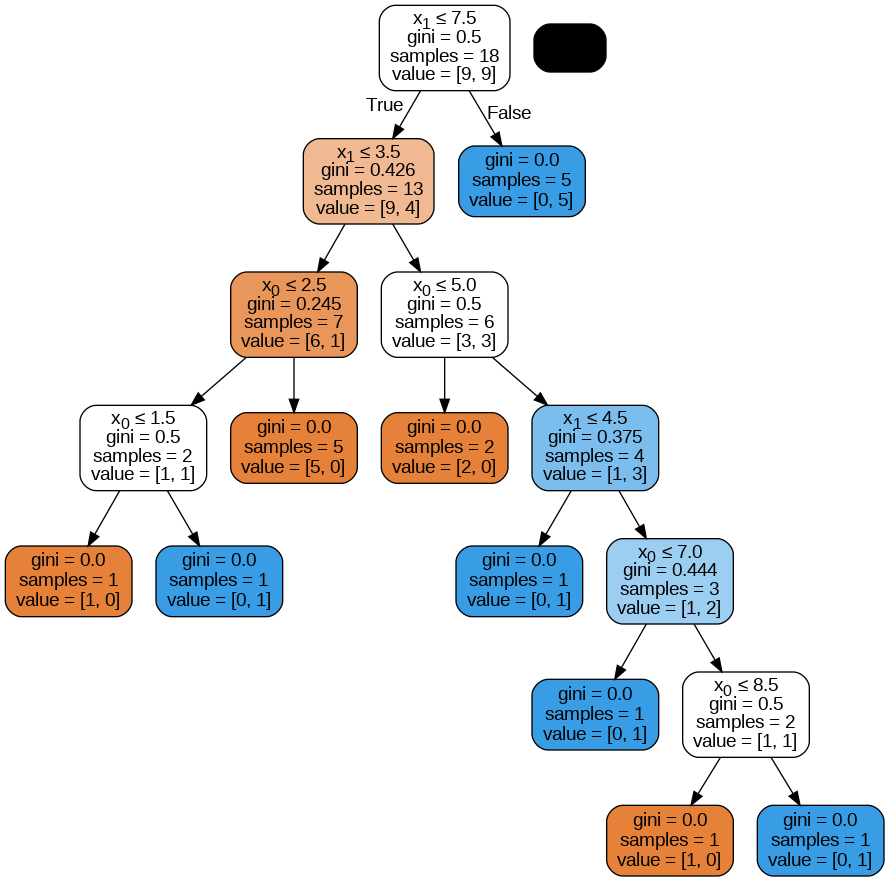

In [7]:
utils.display_tree(decision_tree_classifier)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


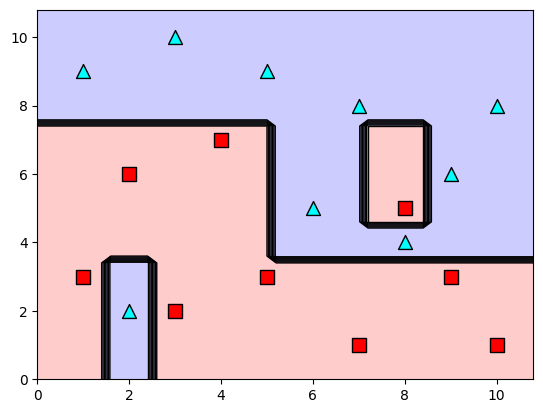

In [8]:
utils.plot_model(features, labels, decision_tree_classifier)

# Training a random forest by hand

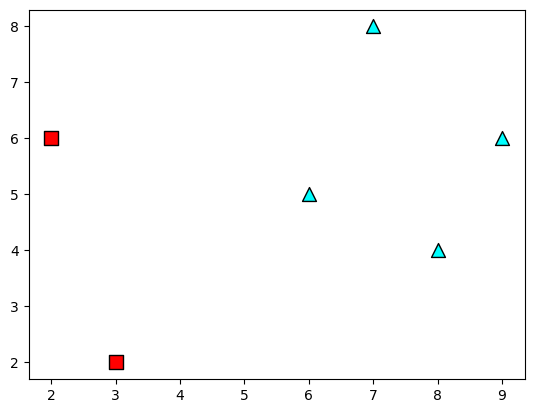

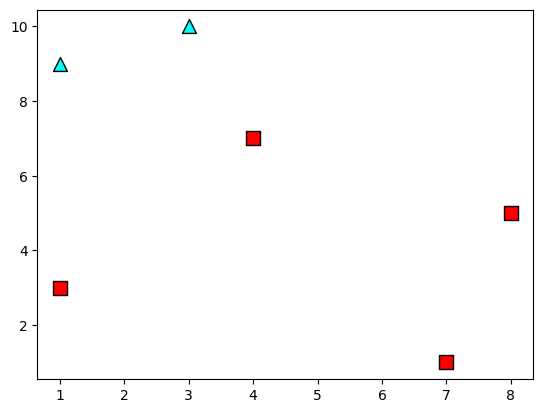

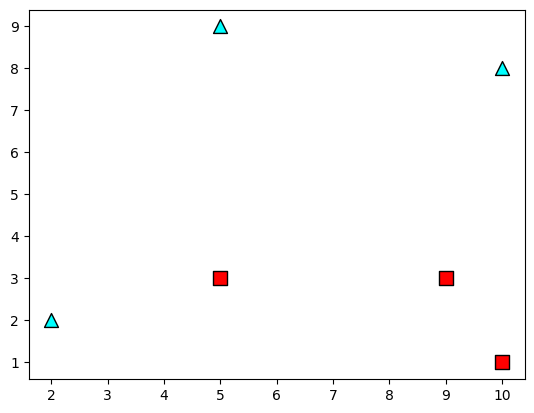

In [9]:
first_batch = spam_dataset.loc[[0,1,2,3,4,5]]
features1 = first_batch[['Lottery', 'Sale']]
labels1 = first_batch['Spam']
utils.plot_points(features1, labels1)
plt.show()

second_batch = spam_dataset.loc[[6,7,8,9,10,11]]
features2 = second_batch[['Lottery', 'Sale']]
labels2 = second_batch['Spam']
utils.plot_points(features2, labels2)
plt.show()

third_batch = spam_dataset.loc[[12,13,14,15,16,17]]
features3 = third_batch[['Lottery', 'Sale']]
labels3 = third_batch['Spam']
utils.plot_points(features3, labels3)

Weak learner 1 training accuracy: 1.0


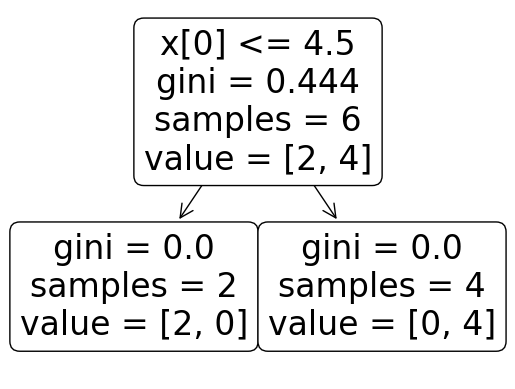

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


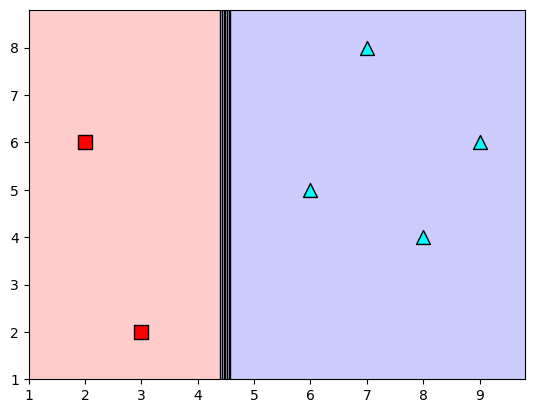

Weak learner 2 training accuracy: 1.0


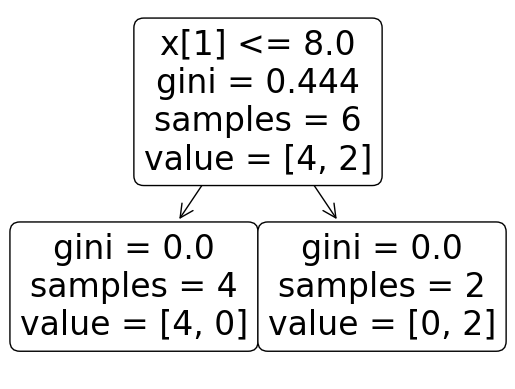

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


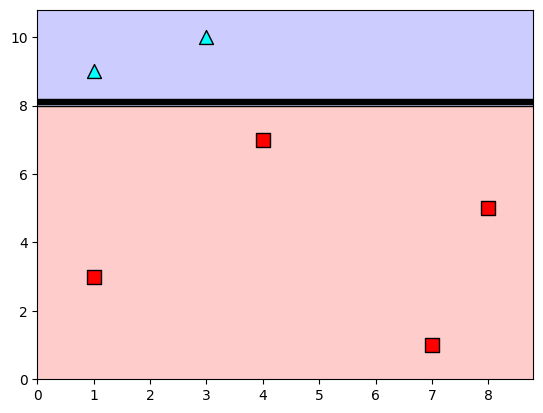

Weak learner 3 training accuracy: 0.8333333333333334


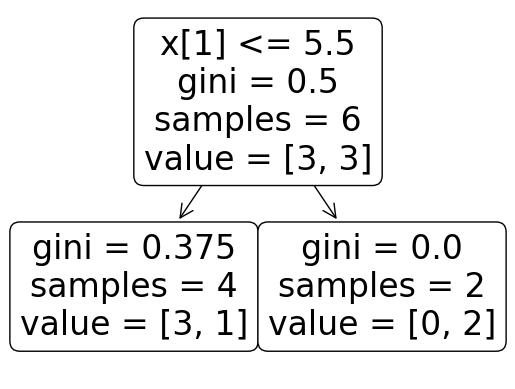

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


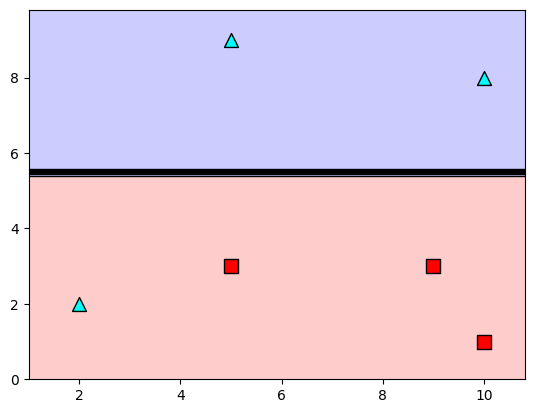

In [10]:
dt1 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt1.fit(features1, labels1)
print("Weak learner 1 training accuracy:", dt1.score(features1, labels1))
tree.plot_tree(dt1, rounded=True)
plt.show()
utils.plot_model(features1, labels1, dt1)

dt2 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt2.fit(features2, labels2)
print("Weak learner 2 training accuracy:", dt2.score(features2, labels2))
tree.plot_tree(dt2, rounded=True)
plt.show()
utils.plot_model(features2, labels2, dt2)

dt3 = DecisionTreeClassifier(random_state=0, max_depth=1)
dt3.fit(features3, labels3)
print("Weak learner 3 training accuracy:", dt3.score(features3, labels3))
tree.plot_tree(dt3, rounded=True)
plt.show()
utils.plot_model(features3, labels3, dt3)

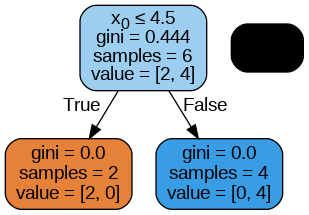

In [11]:
utils.display_tree(dt1)

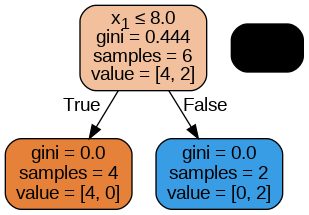

In [12]:
utils.display_tree(dt2)

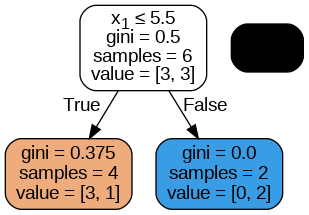

In [13]:
utils.display_tree(dt3)

# Training a random forest using sklearn

In [14]:
from sklearn.ensemble import RandomForestClassifier
# use random forest to classify the data
# use 5 estimators
# use depth = 1
random_forest_classifier = RandomForestClassifier(n_estimators=5, max_depth=1)
random_forest_classifier.fit(features, labels)

RandomForestClassifier(max_depth=1, n_estimators=5)

In [15]:
random_forest_classifier.score(features, labels)

0.8333333333333334

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


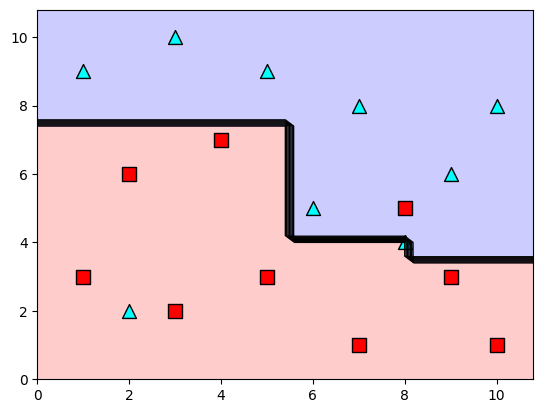

In [16]:
utils.plot_model(features, labels, random_forest_classifier)

****************************** Estimator ******************************


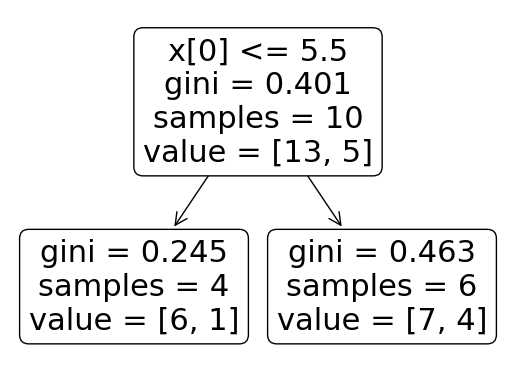

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


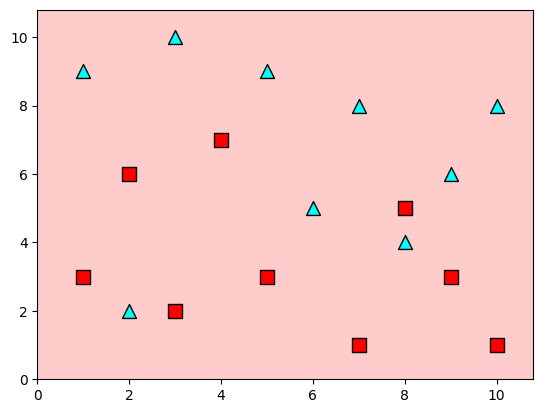

****************************** Estimator ******************************


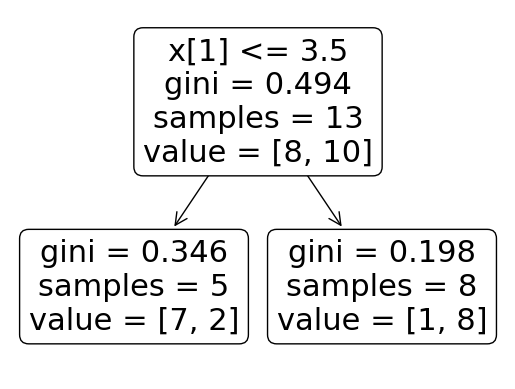

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


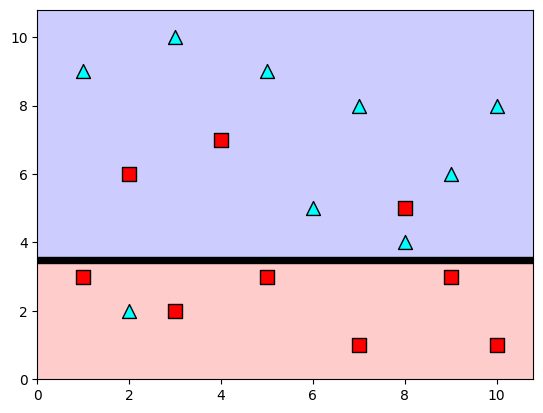

****************************** Estimator ******************************


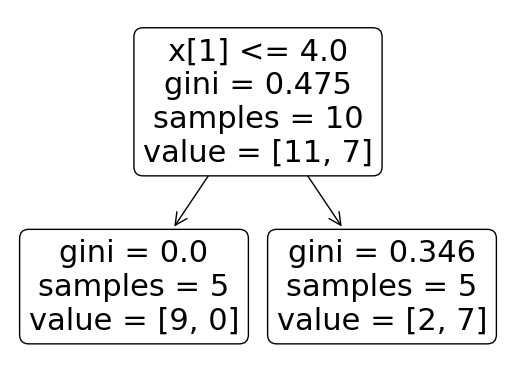

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


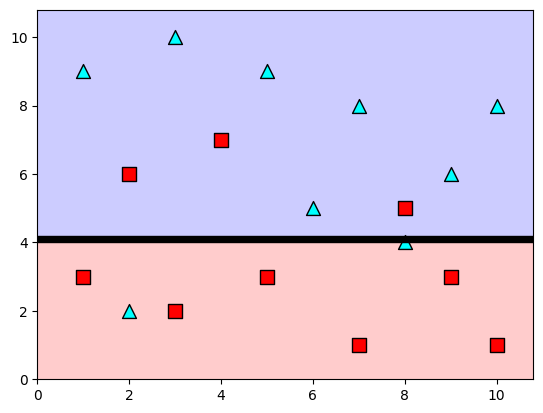

****************************** Estimator ******************************


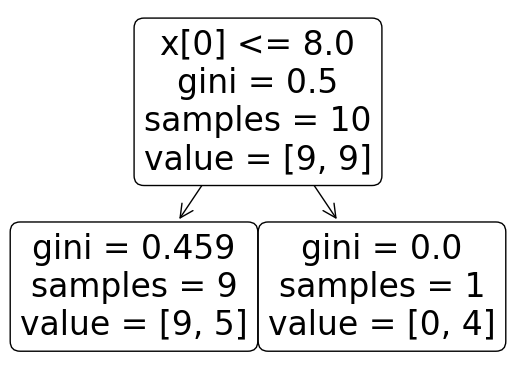

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


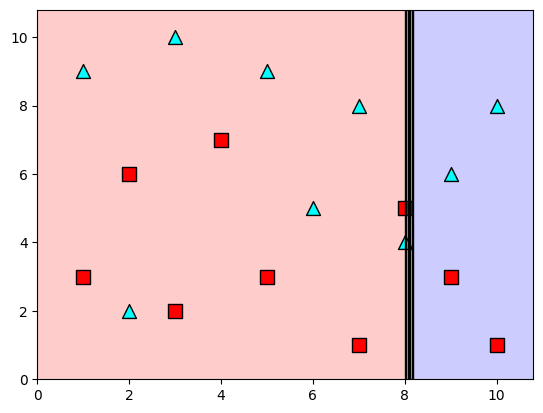

****************************** Estimator ******************************


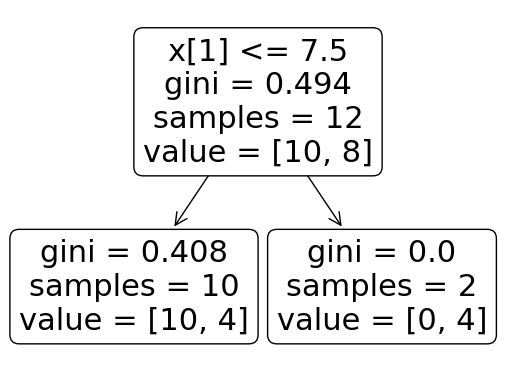

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


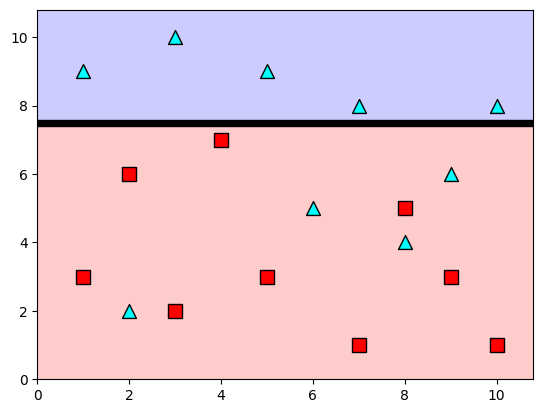

In [17]:
for dt in random_forest_classifier.estimators_:
    print("*"*30, "Estimator", "*"*30)
    tree.plot_tree(dt, rounded=True)
    plt.show()
    utils.plot_model(features, labels, dt)
    plt.show()